In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# The CVS files were downloaded from CrowdTangle. The file lists Facebook posts in last 12 months (from July 2024).
# Page Categories include: Media News Company, Newsagent Newsstand, News Personality, News Site, Newspaper, 
# Political Candidate, Political Party, Politician, Political Organisation 
# CSV name cleaned-XYZ are suitable for this database. This CSV keeps only the coloumns needed for research. 

df = pd.read_csv("delhi-riots-large.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                            --------------  -----  
 0   Page Name                                                                                                         10000 non-null  object 
 1   User Name                                                                                                         9912 non-null   object 
 2   Facebook Id                                                                                                       10000 non-null  int64  
 3   Page Category                                                                                                     10000 non-null  object 
 4   Page Admin Top Country       

In [36]:
# Convert object-type columns to string, except integer columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str)

In [37]:
# Define the keywords to search for
keyword1 = "anti-Hindu"
keyword2 = "anti-Muslim"

In [38]:
# Count the occurrences of the keywords in the "Message" column
keyword1_counts = df[df['Message'].str.contains(keyword1, case=False)]['Page Name'].value_counts()
keyword2_counts = df[df['Message'].str.contains(keyword2, case=False)]['Page Name'].value_counts()

In [39]:
# Print the keyword occurrences
print(f"The keyword '{keyword1}' appears {keyword1_counts.sum()} times in the 'Message' column.")
print(f"The keyword '{keyword2}' appears {keyword2_counts.sum()} times in the 'Message' column.")

The keyword 'anti-Hindu' appears 338 times in the 'Message' column.
The keyword 'anti-Muslim' appears 46 times in the 'Message' column.


<Figure size 800x600 with 0 Axes>

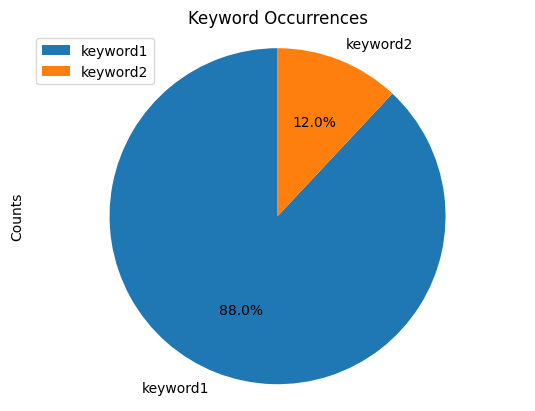

In [40]:
# Create a DataFrame from the counts
data = {
    'Keyword': ['keyword1', 'keyword2'],
    'Counts': [keyword1_counts.sum(), keyword2_counts.sum()]
}
df = pd.DataFrame(data)

# Plot the pie chart
plt.figure(figsize=(8, 6))
df.plot(kind='pie', y='Counts', autopct='%1.1f%%', startangle=90, labels=df['Keyword'], title='Keyword Occurrences')
plt.axis('equal')
plt.show()

In [41]:
# Number keyword occurrences by specific pages
print(f"The breakdown by page for '{keyword1}' is:\n{keyword1_counts}")
print(f"The breakdown by page for '{keyword2}' is:\n{keyword2_counts}")

The breakdown by page for 'anti-Hindu' is:
Page Name
OpIndia.com                                                     239
Organiser Weekly                                                 27
Documenting Crimes Against Hindus                                 7
India Speaks Daily                                                6
Hindutva Abhiyan                                                  5
Hindus of India                                                   4
Hinduism Now Global Press                                         4
Resurging Hinduism                                                3
tfipost.com                                                       2
Delta Edge Artificial Intelligence                                2
TheWire.in                                                        2
Indian Right Wing Community                                       2
MyNation                                                          2
ऑपइंडिया                                                       